# N-Cube Graph Generators with GraphBLAS User Defined Functions

In [1]:
from pygraphblas import *
from pygraphblas.gviz import draw_matrix, draw_cy, draw_graph

N-cubes (or [Hypercubes](https://en.wikipedia.org/wiki/Hypercube)) is an n-dimensional analog of a square (n=2).  Here's a fun video on how to create n-cube graphs.

In [2]:
from IPython.core.display import display, HTML
display(HTML('''
<iframe width="560" height="315" src="https://www.youtube.com/embed/5CA_RliXe5M" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>
    '''))

In order to determine if an edge should exist between any vertices, they vertex ids are compared with the function `one_bit_off(i, j)` which takes two integer parameters, which are vertix ids, and compares how many binary bits are different.  If they are different by only one bit, then the function return true and an edge should exist.

This function is JIT compiled by `numba.jit` and then used as the operator for a union (eadd) of a matrix of source ids (`A.positioni()`) and destination ids (`A.positionj()`) of a dense matrix.  Since the two matrices have the same pattern, the function is called for each possible pair of i and j, returning a dense matrix of 1s which indicate an edge should exist or 0s indicating no edge.  The `nonzero()` operator is then used to return only the 1s.  The pattern of this result is a hypercube.

In [3]:
@binary_op(INT64)
def one_bit_off(i, j):
    def bit_count(i):
        assert 0 <= i < 0x100000000
        i = i - ((i >> 1) & 0x55555555)
        i = (i & 0x33333333) + ((i >> 2) & 0x33333333)
        return (((i + (i >> 4) & 0xF0F0F0F) * 0x1010101) & 0xffffffff) >> 24

    if bit_count(i^j) == 1:
        return 1
    return 0
    

def n_cube(n):
    n = 2**n
    A = Matrix.dense(INT64, n, n, fill=1)
    Ai = A.positioni()
    Aj = A.positionj()
    return Ai.eadd(Aj, one_bit_off).nonzero()

N2 = n_cube(2)

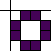

In [4]:
draw_matrix(N2, scale=10, labels=False)

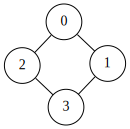

In [5]:
draw_graph(N2, directed=False, show_weight=False, graph_attr=dict(layout='sfdp'))

In [6]:
N3 = n_cube(3)

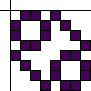

In [7]:
draw_matrix(N3, scale=10, labels=False)

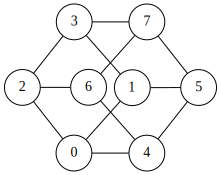

In [8]:
draw_graph(N3, directed=False, show_weight=False, graph_attr=dict(layout='sfdp'))

In [9]:
N4 = n_cube(4)

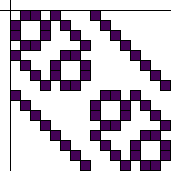

In [10]:
draw_matrix(N4, scale=10, labels=False)

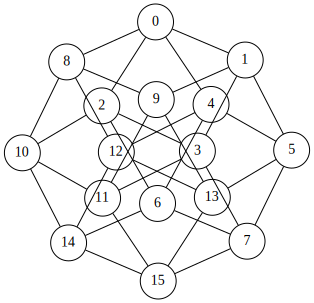

In [11]:
draw_graph(N4, directed=False, show_weight=False, graph_attr=dict(layout='sfdp'))

In [12]:
N5 = n_cube(5)

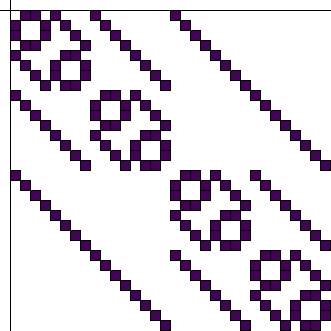

In [13]:
draw_matrix(N5, scale=10, labels=False)

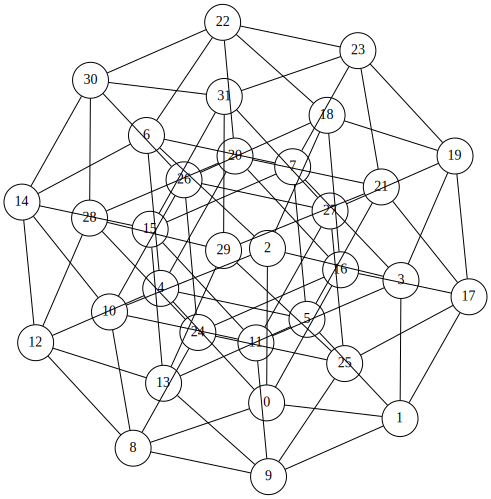

In [14]:
draw_graph(N5, directed=False, show_weight=False, graph_attr=dict(layout='sfdp'))

In [15]:
N6 = n_cube(6)

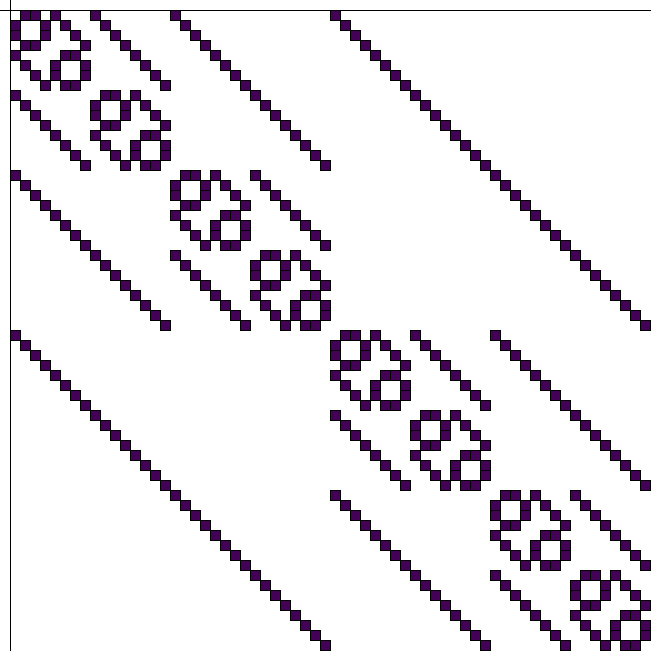

In [16]:
draw_matrix(N6, scale=10, labels=False)

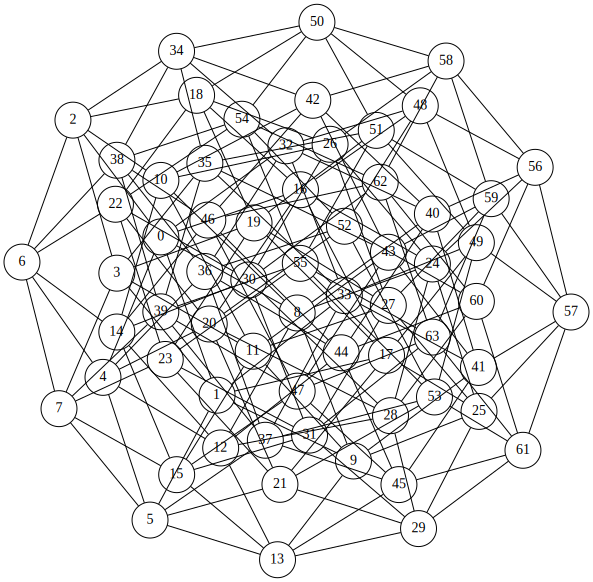

In [17]:
draw_graph(N6, directed=False, show_weight=False, graph_attr=dict(layout='sfdp'))